# Long term analysis

In [1]:
# The data can be split into two major groups:
# - Old data, which is bundled in days
# - Recent data, which is bundled in hours
# Here I aim to analyze the data since the first entry I could gather until the last one, all bundled by days

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json('data/data_from_2021-10-06')
data

,datetime,mean_price,quantity
0,2012-12-12 01:00:00,1.535,4719
1,2012-12-13 01:00:00,1.786,13317
2,2012-12-14 01:00:00,1.942,7984
3,2012-12-15 01:00:00,2.027,8270
4,2012-12-16 01:00:00,2.037,7134
...,...,...,...
3904,2021-10-06 15:00:00,2.021,1481
3905,2021-10-06 16:00:00,1.990,984
3906,2021-10-06 17:00:00,2.016,948
3907,2021-10-06 18:00:00,2.016,750


In [4]:
# I want to group the info by date
data['datetime'] = data['datetime'].dt.date
data

,datetime,mean_price,quantity
0,2012-12-12,1.535,4719
1,2012-12-13,1.786,13317
2,2012-12-14,1.942,7984
3,2012-12-15,2.027,8270
4,2012-12-16,2.037,7134
...,...,...,...
3904,2021-10-06,2.021,1481
3905,2021-10-06,1.990,984
3906,2021-10-06,2.016,948
3907,2021-10-06,2.016,750


In [5]:
# storing relevant values by date
groups = data.groupby('datetime')
mean_price_by_date = pd.DataFrame(groups['mean_price'].mean())
quantity_by_date = pd.DataFrame(groups['quantity'].sum())

# reindexing and removing duplicates
data.index = data['datetime']
data.drop_duplicates(subset = ['datetime'], inplace = True)

# merging stored values into the dataset
data['mean_price'] = mean_price_by_date
data['quantity'] = quantity_by_date
data

,datetime,mean_price,quantity
datetime,,,
2012-12-12,2012-12-12,1.535000,4719
2012-12-13,2012-12-13,1.786000,13317
2012-12-14,2012-12-14,1.942000,7984
2012-12-15,2012-12-15,2.027000,8270
2012-12-16,2012-12-16,2.037000,7134
...,...,...,...
2021-10-02,2021-10-02,2.022292,11370
2021-10-03,2021-10-03,2.051708,10151
2021-10-04,2021-10-04,2.068917,9032


If this graph looks just like the one in steam page, everything is alright!


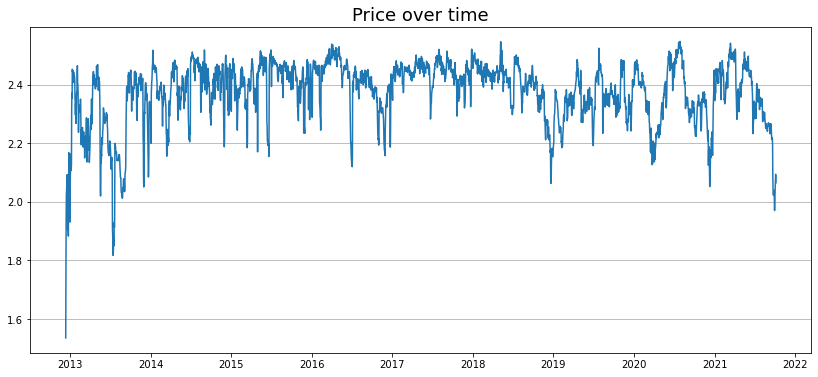

In [20]:
# Reproducing steam graph, just to make sure everything is alright
steam_graph = plt.figure(figsize = [14, 6])
graph = steam_graph.add_subplot(1, 1, 1)
graph.plot(data.index, data['mean_price'])
graph.set_title('Price over time', {'fontsize': 18})
graph.grid(axis = 'y')
print('If this graph looks just like the one in steam page, everything is alright!')

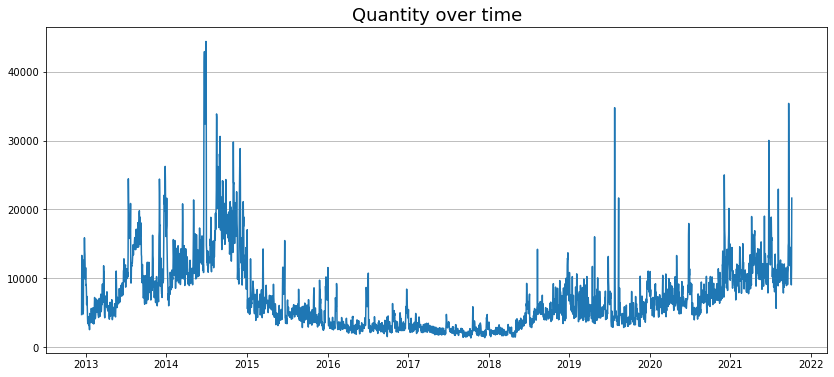

In [21]:
# Now, the first question: how much the quantity varies over time?
steam_graph = plt.figure(figsize = [14, 6])
graph = steam_graph.add_subplot(1, 1, 1)
graph.plot(data.index, data['quantity'])
graph.set_title('Quantity over time', {'fontsize': 18})
graph.grid(axis = 'y')

In [22]:
data.describe()

,mean_price,quantity
count,3221.000000,3221.000000
mean,2.374696,7165.664700
std,0.107224,5139.136224
min,1.535000,1311.000000
25%,2.328000,3445.000000
50%,2.403000,5747.000000
75%,2.451000,9459.000000
max,2.548000,44430.000000


In [ ]:
# By looking at the graph, it seems that 